In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_regression

In [16]:
train_data = pd.read_csv('Desktop/QUERA/Exercises/3rd_week/train.csv')
train_data

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
0,Afghanistan,2015,Developing,33736494.0,65.0,1154,6.0,65.0,0.1,62,83,8.16,584.259210,19.1,17.2,0.01,10.1,65.0
1,Afghanistan,2014,Developing,327582.0,62.0,492,58.0,62.0,0.1,64,86,8.18,612.696514,18.6,17.5,0.01,10.0,59.9
2,Afghanistan,2013,Developing,31731688.0,64.0,430,62.0,64.0,0.1,66,89,8.13,631.744976,18.1,17.7,0.01,9.9,59.9
3,Afghanistan,2012,Developing,3696958.0,67.0,2787,67.0,67.0,0.1,69,93,8.52,669.959000,17.6,17.9,0.01,9.8,59.5
4,Afghanistan,2011,Developing,2978599.0,68.0,3013,68.0,68.0,0.1,71,97,7.87,63.537231,17.2,18.2,0.01,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,Zimbabwe,2004,Developing,12777511.0,68.0,31,67.0,65.0,33.6,27,42,7.13,454.366654,27.1,9.4,4.36,9.2,44.3
2844,Zimbabwe,2003,Developing,12633897.0,7.0,998,7.0,68.0,36.7,26,41,6.52,453.351155,26.7,9.8,4.06,9.5,44.5
2845,Zimbabwe,2002,Developing,125525.0,73.0,304,73.0,71.0,39.8,25,40,6.53,57.348340,26.3,1.2,4.43,10.0,44.8
2846,Zimbabwe,2001,Developing,12366165.0,76.0,529,76.0,75.0,42.1,25,39,6.16,548.587312,25.9,1.6,1.72,9.8,45.3


In [17]:
test_data = pd.read_csv('Desktop/QUERA/Exercises/3rd_week/test.csv')
test_data

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling
0,Burundi,2015,Developing,119927.0,94.0,9,94.0,94.0,0.7,21,31,NaN,33.681223,18.7,7.3,NaN,10.6
1,Burundi,2014,Developing,989179.0,95.0,0,95.0,95.0,0.7,22,32,7.54,312.748979,18.2,7.4,0.01,10.6
2,Burundi,2013,Developing,96186.0,96.0,0,96.0,96.0,1.0,22,32,8.30,282.755525,17.6,7.4,0.01,10.5
3,Burundi,2012,Developing,931971.0,96.0,49,96.0,96.0,1.2,22,33,8.21,265.285651,17.1,7.5,0.01,10.3
4,Burundi,2011,Developing,94358.0,96.0,129,95.0,96.0,1.5,22,33,8.58,26.479973,16.6,7.6,4.16,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Papua New Guinea,2004,Developing,6161517.0,6.0,1385,59.0,62.0,1.5,11,15,8.39,637.361621,4.4,1.5,0.58,7.6
76,Papua New Guinea,2003,Developing,61724.0,67.0,3863,62.0,68.0,1.4,11,14,6.79,588.358260,39.6,1.5,0.59,7.2
77,Papua New Guinea,2002,Developing,5862316.0,6.0,17620,54.0,61.0,1.4,11,14,7.69,511.665773,38.9,1.5,0.61,6.9
78,Papua New Guinea,2001,Developing,5716152.0,59.0,4023,52.0,55.0,1.3,11,14,6.68,539.415280,38.2,1.5,0.68,6.6


In [18]:
# Splitting the data into train and test
X = train_data.drop('Life expectancy', axis=1)
y = train_data['Life expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensuring that the test data won't be changed
X_final_test = test_data.copy()

Country                  0.000000
Year                     0.000000
Status                   0.000000
Population              22.612360
Hepatitis B             19.030899
Measles                  0.000000
Polio                    0.667135
Diphtheria               0.667135
HIV/AIDS                 0.000000
infant deaths            0.000000
under-five deaths        0.000000
Total expenditure        7.759831
GDP                     15.519663
BMI                      1.123596
thinness  1-19 years     1.123596
Alcohol                  6.601124
Schooling                5.617978
Life expectancy          0.000000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               2848 non-null   object 
 1   Year                  2848 non-null   int64  
 2   Status                2848 non-null   object 
 3   Popula

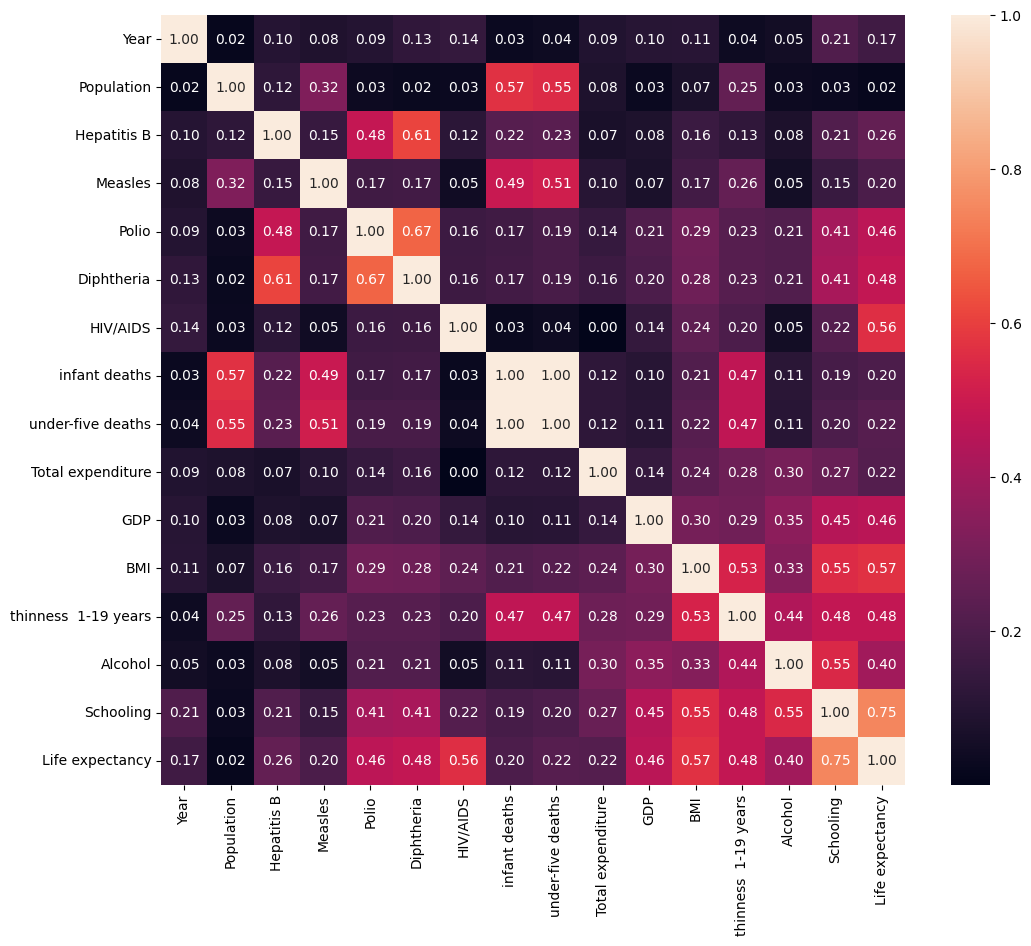

In [19]:
# Primary data analysis
import matplotlib.pyplot as plt
import seaborn as sns

data_percentage = train_data.isnull().mean() * 100
data_corr = train_data.select_dtypes(include=[np.number]).corr()

# print(data_info)
print(data_percentage)
print(train_data.info())

plt.figure(figsize=(12, 10))
sns.heatmap(data_corr.abs(), annot=True, fmt='.2f')
plt.show()

In [20]:
# Fill missing values by KNNImputer method
knn_targets = ['Population', 'Hepatitis B', 'GDP']
knn = KNNImputer(n_neighbors=5)
X_train[knn_targets] = knn.fit_transform(X_train[knn_targets])
X_test[knn_targets] = knn.transform(X_test[knn_targets])
X_final_test[knn_targets] = knn.transform(X_final_test[knn_targets])

# Fill missing values by SimpleImputer method
mean_targets = ['Alcohol', 'Polio', 'Diphtheria', 'BMI', 'Total expenditure', 'thinness  1-19 years', 'Schooling']
simple_imputer = SimpleImputer(strategy='mean')
X_train[mean_targets] = simple_imputer.fit_transform(X_train[mean_targets])
X_test[mean_targets] = simple_imputer.transform(X_test[mean_targets])
X_final_test[mean_targets] = simple_imputer.transform(X_final_test[mean_targets])

# Encoding the categorical features
# One-hot encoding for 'Country' feature
X_train = pd.get_dummies(X_train, columns=['Country'], prefix='Country')
X_test = pd.get_dummies(X_test, columns=['Country'], prefix='Country')
X_final_test = pd.get_dummies(X_final_test, columns=['Country'], prefix='Country')
# Label encoding for 'Status' feature
label_encoder = LabelEncoder()
X_train['Status'] = label_encoder.fit_transform(X_train['Status'])
X_test['Status'] = label_encoder.transform(X_test['Status'])
X_final_test['Status'] = label_encoder.transform(X_final_test['Status'])

# Reshap and configure the test data
train_columns = X_train.columns
test_columns = X_test.columns
final_test_columns = X_final_test.columns

missing_columns_test = set(train_columns) - set(test_columns)
for column in missing_columns_test:
    X_test[column] = 0

missing_columns_final_test = set(train_columns) - set(final_test_columns)
for column in missing_columns_final_test:
    X_final_test[column] = 0

X_test = X_test[train_columns]
X_final_test = X_final_test[train_columns]

# Control the outliers
numerical_columns = X_train.select_dtypes(include=np.number).columns
z_scores = np.abs(stats.zscore(X_train[numerical_columns]))
outliers = (z_scores >= 3).all(axis=1)
X_train = X_train[~outliers]
y_train = y_train[~outliers]

# Selecting the best features
best_features = SelectKBest(score_func=f_regression, k='all')
fit = best_features.fit(X_train[numerical_columns],y_train)
scores_df = pd.DataFrame(fit.scores_)
columns_df = pd.DataFrame(X_train[numerical_columns].columns)
feature_scores = pd.concat([columns_df,scores_df],axis=1)
feature_scores.columns = ['Specs','Score']
feature_scores = feature_scores.sort_values(by = "Score" , ascending=False)
important_features = feature_scores[feature_scores['Score'] > 20]['Specs'].tolist()
X_train = X_train[important_features]
X_test = X_test[important_features]
X_final_test = X_final_test[important_features]

# Scaling the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_final_test = scaler.transform(X_final_test)

C:\Users\ramti\AppData\Local\Temp\ipykernel_6292\4283375485.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_final_test[column] = 0
C:\Users\ramti\AppData\Local\Temp\ipykernel_6292\4283375485.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_final_test[column] = 0
C:\Users\ramti\AppData\Local\Temp\ipykernel_6292\4283375485.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

poly_transformer = PolynomialFeatures(include_bias=False)
poly_parameters = {'degree': [2, 3, 4]}

grid_search = GridSearchCV(poly_transformer, poly_parameters, cv=5, scoring='r2', n_jobs=-1)

In [ ]:
# Fit the grid search to the data and find the best degree
grid_search.fit(X_train, y_train)
best_poly = grid_search.best_params_['degree']

In [8]:
# Assign the best degree to the polynomial transformer
poly_transformer = PolynomialFeatures(degree=best_poly, include_bias=False)

X_train_poly = poly_transformer.fit_transform(X_train)
X_test_poly = poly_transformer.transform(X_test)
X_final_test_poly = poly_transformer.transform(X_final_test)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_poly, y_train)

In [ ]:
# evaluate your model
from sklearn.metrics import r2_score

y_pred = model.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
print(f'R2 score: {r2}')

In [ ]:
# Predicting the life expectancy for the final test data
y_final_pred = model.predict(X_final_test_poly)

# Creating the submission DataFrame
submission = pd.DataFrame({'Life expectancy': y_final_pred})
submission

In [ ]:
import zipfile
import joblib

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)


joblib.dump(poly_transformer, 'poly_transformer')
joblib.dump(model, 'model')
submission.to_csv('submission.csv', index=False)

file_names = ['poly_transformer', 'model', 'submission.csv', 'life_expectancy.ipynb']
compress(file_names)